In [7]:
!pip install seaborn
!pip install prince

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
import prince
import os
import subprocess

In [9]:
def get_git_root():
    try:
        root_dir = (
            subprocess.check_output(["git", "rev-parse", "--show-toplevel"])
            .strip()
            .decode("utf-8")
        )
        return root_dir
    except subprocess.CalledProcessError:
        raise Exception("This is not a Git repository")


# Get the Git repository's root directory
repo_root = get_git_root()

file_path = os.path.join(repo_root, "SNHR8SFL.dta")
df = pd.read_stata(file_path)

In [10]:
filtered_df=df[df['hv015'].str.contains('completed',na=False)]


In [11]:
# List of columns to exclude
columns_to_exclude = [
    'hhid', 'hv000', 'hv002', 'hv003', 'hv004', 'hv006', 'hv007', 'hv008', 
    'hv008a', 'hv010', 'hv011', 'hv012', 'hv013', 'hv015', 'hv016', 'hv017', 
    'hv018', 'hv019', 'hv020', 'hv021', 'hv022', 'hv023', 'hv024', 'hv027', 
    'hv028', 'hv030', 'hv031', 'hv032', 'hv035', 'hv040', 'hv041', 'hv042', 
    'hv044', 'hv045a', 'hv045b', 'hv045c', 'hv046', 'hv047', 'hv048', 'hv801', 
    'hv802', 'hv803', 'hv804', 'hv807d', 'hv807m', 'hv807y', 'hv807c', 'hv807a', 
    'hv218', 'hv236a', 'hv270', 'hv271', 'hv270a', 'hv271a', 'shdepart', 'hml1a',
    'hml12','ha62_1','ha62_2'
]

new_df = filtered_df.drop(columns=columns_to_exclude, errors='ignore')


In [12]:
base_columns = [
    'hvidx', 'hv101', 'hv102', 'hv103', 'hv104', 'hv105', 'hv106', 'hv107', 'hv108', 
    'hv109', 'hv110', 'hv111', 'hv112', 'hv113', 'hv114', 'hv115', 'hv116', 'hv117', 
    'hv118', 'hv119', 'hv120', 'hv121', 'hv122', 'hv123', 'hv124', 'hv125', 'hv126', 
    'hv127', 'hv128', 'hv129', 'hv140', 'idxh4', 'sh17a', 'sh19a', 'sh19aa', 'sh19ba', 
    'sh19c', 'sh19da', 'sh19db', 'sh20a', 'sh21a', 'sh21b', 'sh21c', 'sh21d', 'sh21e', 
    'sh21f', 'sh21g', 'sh21h', 'sh21i', 'sh21j', 'sh22', 'sh23', 'sh24', 'sh25', 'sh26', 
    'hmhidx', 'hml12', 'hml13', 'hml14', 'hml15', 'hml16', 'hml16a', 'hml17', 'hml18', 
    'hml19', 'hml20', 'hml34'
]

columns_to_exclude = [f"{base_col}_{i:02d}" for base_col in base_columns for i in range(1, 65)]

new_df2=new_df.drop(columns=columns_to_exclude, errors='ignore')

In [13]:
base_columns = [
    'sh168a', 'sh169', 'sh170a', 'sh170b', 'sh170c', 'sh170d', 'sh170e', 'sh170f', 'sh170g', 
    'sh170h', 'sh170i', 'sh170j', 'sh170k', 'sh170l', 'sh170m', 'sh170n', 'sh170x', 'sh171a', 
    'sh171b', 'sh171c', 'sh171d', 'sh171e', 'sh171x', 'sh172a', 'sh172b', 'sh172c', 'sh172d', 
    'sh172e', 'sh172f', 'sh172g', 'sh172h', 'sh172i', 'sh172j', 'sh172x', 'sh173a', 'sh173b', 
    'sh173c','sh173d', 'sh173e', 'sh174a', 'sh174b', 'sh174c', 'sh174d', 'sh174e', 'sh174f', 
    'sh174g', 'sh174h', 'sh175a', 'sh175b', 'sh175c', 'sh175d', 'sh175e', 'sh175f', 'sh175g', 
    'sh175h'
]
columns_to_exclude = [
    f"{base_col}_{i}" 
    for base_col in base_columns 
    for i in range(1, 4)
]
new_df3=new_df2.drop(columns=columns_to_exclude, errors='ignore')

In [14]:
base_columns = [
    'hc0', 'hc1', 'hc1a', 'hc2', 'hc2a', 'hc2b', 'hc3', 'hc3a', 'hc3b', 'hc13', 'hc15', 'hc15a', 
    'hc15b', 'hc16', 'hc17', 'hc18', 'hc19', 'hc20', 'hc21', 'hc21a', 'hc21b', 'hc22', 'hc23', 
    'hc24', 'hc27', 'hc30', 'hc31', 'hc32', 'hc32a', 'hc33', 'hc35', 'hc60', 'hc61', 'hc62', 'hc63', 
    'hc64', 'hc68', 'hc70', 'hc71', 'hc72', 'hc73'
]
columns_to_exclude = [
    f"{base_col}_{i:02d}" 
    for base_col in base_columns 
    for i in range(1, 13)  # Suffixes from _01 to _12
]
new_df4=new_df3.drop(columns=columns_to_exclude, errors='ignore')

In [15]:
base_columns = [
    'hmlidx', 'hml3', 'hml4', 'hml5', 'hml6', 'hml7', 'hml8', 'hml9', 'hml10', 'hml11', 'hml21',
    'hmla', 'hmlb', 'hmlc', 'hmld', 'hmle', 'hml22', 'hml23', 'hml24', 'sh145a', 'sh145b', 'sh147a',
    'sh147b', 'sh147c'
]
columns_to_exclude = [
    f"{base_col}_{i}" 
    for base_col in base_columns 
    for i in range(1, 8) 
]

new_df5=new_df4.drop(columns=columns_to_exclude, errors='ignore')

In [16]:
df_cleaned=new_df5.dropna(axis=1,how='all')

In [17]:
df_cleaned['sh155b'] = df.apply(
    lambda row: 'NotApplicable' if 'no' in str(row['sh155a']).lower() else row['sh155b'], 
    axis=1
)

/var/folders/z_/86v4rkcx42l5ny9cxfq86xpr0000gn/T/ipykernel_67124/1401282247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['sh155b'] = df.apply(


In [18]:
df_cleaned['sh163a'] = df.apply(
    lambda row: 'NotApplicable' if 'no' in str(row['sh162a']).lower() else row['sh163a'], 
    axis=1
)

/var/folders/z_/86v4rkcx42l5ny9cxfq86xpr0000gn/T/ipykernel_67124/60922748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['sh163a'] = df.apply(


In [19]:
df_cleaned['sh163b'] = df.apply(
    lambda row: 'NotApplicable' if 'no' in str(row['sh162b']).lower() else row['sh163b'], 
    axis=1
)  

/var/folders/z_/86v4rkcx42l5ny9cxfq86xpr0000gn/T/ipykernel_67124/1159570663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['sh163b'] = df.apply(


In [20]:
df_cleaned['sh163c'] = df.apply(
    lambda row: 'NotApplicable' if 'no' in str(row['sh162c']).lower() else row['sh163c'], 
    axis=1
)  

/var/folders/z_/86v4rkcx42l5ny9cxfq86xpr0000gn/T/ipykernel_67124/3939189428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['sh163c'] = df.apply(


In [21]:
df_cleaned['sh163d'] = df.apply(
    lambda row: 'NotApplicable' if 'no' in str(row['sh162d']).lower() else row['sh163d'], 
    axis=1
)  

/var/folders/z_/86v4rkcx42l5ny9cxfq86xpr0000gn/T/ipykernel_67124/3512856289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['sh163d'] = df.apply(


In [22]:
df_cleaned['sh163e'] = df.apply(
    lambda row: 'NotApplicable' if 'no' in str(row['sh162e']).lower() else row['sh163e'], 
    axis=1
)  

/var/folders/z_/86v4rkcx42l5ny9cxfq86xpr0000gn/T/ipykernel_67124/307718314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['sh163e'] = df.apply(


In [23]:
df_cleaned=df_cleaned.drop(columns=['sh166', 'hv202','hv240','hv246g','hv255','sh162e','sh163e'])

In [24]:
for col in df_cleaned.columns:
    df_cleaned[col]=df_cleaned[col].replace({'unknown': np.nan,'none':0, '95 or more': 95,'don\'t know':np.nan})

/var/folders/z_/86v4rkcx42l5ny9cxfq86xpr0000gn/T/ipykernel_67124/3279565717.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_cleaned[col]=df_cleaned[col].replace({'unknown': np.nan,'none':0, '95 or more': 95,'don\'t know':np.nan})
/var/folders/z_/86v4rkcx42l5ny9cxfq86xpr0000gn/T/ipykernel_67124/3279565717.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned[col]=df_cleaned[col].replace({'unknown': np.nan,'none':0, '95 or more': 95,'don\'t know':np.nan})
/var/folders/z_/86v4rkcx42l5ny9cxfq86xpr0000gn/T/ipykernel_67124/3279565717.py:

In [25]:
### Not imputing values that have over 50% missing
df_cleaned_less50missing = df_cleaned.loc[:, df_cleaned.isnull().sum() < (0.5 * len(df_cleaned))]

In [26]:
def knn_imputation_for_categorical(df, column_name, k_values):
    best_k = None
    mode_scores = []

    # Get rows with missing values
    test_data = df[df[column_name].isna()] # Rows with missing values in the target column
    
    if test_data.empty:  # If there are no missing values in the column, skip it
        return None, None
    
    # Split data into complete and incomplete sets
    train_data = df.dropna(subset=[column_name])  # Rows without missing values in the target column
    train_data=train_data.astype(str)
    test_data=test_data.astype(str)
    X_train = train_data.drop(column_name, axis=1)  # Remove column to impute
    y_train = train_data[column_name]
    X_test = test_data.drop(column_name, axis=1)
    

    # Convert categorical columns to strings to avoid type mismatches

    # One-Hot Encoding of categorical variables (fix the sparse_output argument)
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Updated argument for newer versions
    X_train_encoded = encoder.fit_transform(X_train)
    X_test_encoded = encoder.transform(X_test)

    # Test different values of k (e.g., from 1 to 10 neighbors)
    for k in k_values:
        # Initialize KNN imputer with the current k value
        knn = KNeighborsClassifier(n_neighbors=k)
        
        # Fit the model and predict the missing values
        knn.fit(X_train_encoded, y_train)
        imputed_values = knn.predict(X_test_encoded)
        
        # Append the predicted values for mode calculation
        mode_scores.append(imputed_values)
    
    # Flatten the predictions and calculate the most frequent mode for each k
    mode_counts = []
    for scores in mode_scores:
        mode_counts.append(Counter(scores).most_common(1)[0][1])  # Get the frequency of the most common value

    # Select the k with the highest mode frequency
    best_k = k_values[np.argmax(mode_counts)]
    
    return best_k, mode_scores
# Define the range of k values to test
k_values = range(1, 31)

# Only focus on categorical columns that are of type 'category' or 'object'
categorical_cols = df_cleaned_less50missing.select_dtypes(include=['category','object']).columns

# Dictionary to store the best k and mode_scores for each column with missing values
best_k_dict = {}

# Impute categorical columns using KNN with mode imputation
for column in categorical_cols:
    if df_cleaned_less50missing[column].isna().sum() > 0:  # If there are missing values in the column
        best_k, mode_scores = knn_imputation_for_categorical(df_cleaned_less50missing, column, k_values)
        
        if best_k is not None:
            best_k_dict[column] = {'best_k': best_k, 'mode_scores': mode_scores}





In [27]:
# Create a copy of the dataframe to store imputed values
df_imputed = df_cleaned_less50missing.copy()

# Impute categorical columns using the best k (mode imputation)
for column in categorical_cols:
    if df_cleaned_less50missing[column].isna().sum() > 0 and column in best_k_dict:
        print(f"Imputing column: {column}")
        
        # Get the best k value for this column
        best_k = best_k_dict[column]['best_k']
        
        # Initialize KNeighborsClassifier
        knn = KNeighborsClassifier(n_neighbors=best_k)
        
        # Prepare training features (drop the target column)
        X_train = df_cleaned_less50missing.drop(column, axis=1).astype(str)
        X_train = X_train.fillna('missing')  # Replace NaN in features
        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        X_train_encoded = encoder.fit_transform(X_train)
        
        # Prepare the target column
        y_train = df_cleaned_less50missing[column]
        
        # Create masks for missing and non-missing rows
        non_nan_mask = y_train.notna()
        missing_mask = y_train.isna()
            
        # Fit the model on rows with no missing target values
        knn.fit(X_train_encoded[non_nan_mask], y_train[non_nan_mask].astype(str))
        
        # Predict missing values only
        if missing_mask.sum() > 0:  # Ensure there are missing values to predict
            X_missing = X_train_encoded[missing_mask]
            imputed_values = knn.predict(X_missing)
            if df_imputed[column].dtype=='category':
                current_categories = df_imputed[column].cat.categories
                new_categories = pd.Index(imputed_values).unique()  # Get unique values from imputed predictions
                updated_categories = current_categories.union(new_categories)
                
                # Set the updated categories to the column before assigning values
                df_imputed[column] = df_imputed[column].cat.set_categories(updated_categories)

            # Assign the imputed values
            df_imputed.loc[missing_mask, column] = imputed_values

# Checking remaining missing values
print("Missing values per column after imputation:")
print(df_imputed.isna().sum())


Imputing column: hv201b
Imputing column: hv204
Imputing column: hv220
Imputing column: hv223
Imputing column: hv225
Imputing column: hv228
Imputing column: hv230b
Imputing column: hv232
Imputing column: hv232b
Imputing column: hv232y
Imputing column: hv237
Imputing column: hv237a
Imputing column: hv237b
Imputing column: hv237c
Imputing column: hv237d
Imputing column: hv237e
Imputing column: hv237f
Imputing column: hv237x
Imputing column: hv237z
Imputing column: hv238a
Imputing column: hv241
Imputing column: hv246a
Imputing column: hv246b
Imputing column: hv246c
Imputing column: hv246d
Imputing column: hv246e
Imputing column: hv246f
Imputing column: hv246h
Imputing column: hv263
Imputing column: sh134a
Imputing column: sh134b
Imputing column: sh134c
Imputing column: sh162a
Imputing column: sh163a
Imputing column: sh162c
Imputing column: sh165
Missing values per column after imputation:
hv001     0
hv005     0
hv009     0
hv014     0
hv025     0
         ..
sh132p    0
sh133c    0
sh133f

In [28]:
df_cleaned_nomissing=df_cleaned.dropna(axis=1)

In [29]:
def FAMD_calc(df, explained=0.90):  # Default explained variance threshold is 90%
    df = df.apply(lambda x: x.astype('float64') if pd.api.types.is_numeric_dtype(x) else x)
    df = df.drop(columns=['hv001', 'hv005'])  # Drop unnecessary columns
    for column in df.columns:
        # Check if all values are numeric
        if pd.api.types.is_numeric_dtype(df[column]):
            # If all are numeric, ensure the dtype is float64
            df[column] = df[column].astype('float64')
        else:
            # If any are strings, set dtype to 'category'
            df[column] = df[column].astype('category')
            # Convert all cells to string type
            df[column] = df[column].cat.codes.astype(str)

    # Fit the FAMD model with the maximum number of components based on the number of features
    n_components = df.shape[1]  # Set max components equal to the number of features
    famd = prince.FAMD(n_components=n_components)

    # Fit the model
    famd.fit(df)
    X_famd = famd.transform(df)  # Transform data into FAMD components

    # Compute the singular values (to find variance)
    singular_values = np.linalg.svd(X_famd, full_matrices=False)[1]

    # Compute the explained variance
    explained_variance = (singular_values ** 2) / sum(singular_values ** 2)
    cumulative_explained_variance = np.cumsum(explained_variance)

    # Find the number of components that explain the desired cumulative variance
    n_components_best = np.where(cumulative_explained_variance >= explained)[0][0] + 1

    # Plot explained variance and cumulative explained variance
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(explained_variance) + 1), explained_variance, label='Explained Variance')

    # Plot the cumulative explained variance
    plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, label='Cumulative Explained Variance', linestyle='--')

    # Customize the plot
    plt.title('Explained Variance vs. Number of Components')
    plt.xlabel('Number of Components')
    plt.ylabel('Explained Variance')
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()

    # Refit the model with the optimal number of components
    famd = prince.FAMD(n_components=n_components_best)
    famd.fit(df)
    
    # Calculate the wealth index (first principal component)
    df['wealth_index'] = famd.transform(df).iloc[:, 0]
    
    return df ###Returning the dataframe with the wealth index

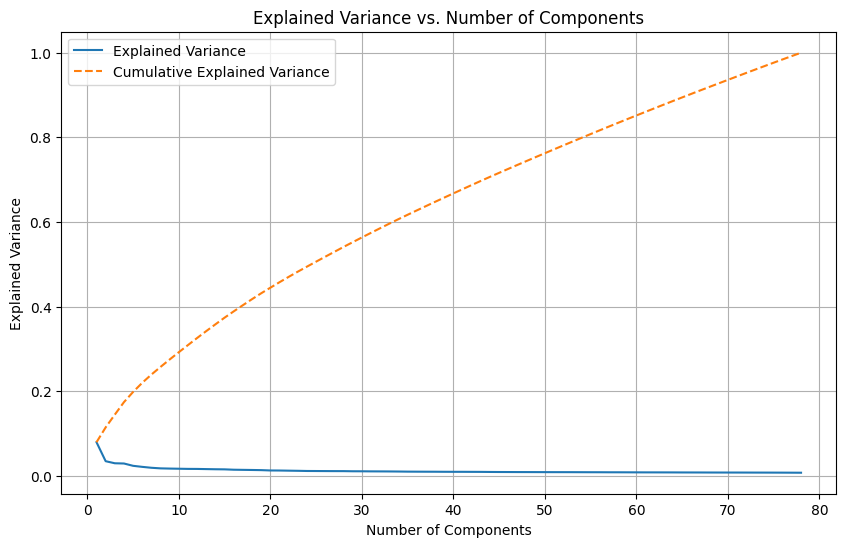

/Users/hailan/anaconda3/envs/seminar/lib/python3.13/site-packages/prince/famd.py:86: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  eta2[col] = (
/Users/hailan/anaconda3/envs/seminar/lib/python3.13/site-packages/prince/famd.py:86: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  eta2[col] = (
/Users/hailan/anaconda3/envs/seminar/lib/python3.13/site-packages/prince/famd.py:86: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

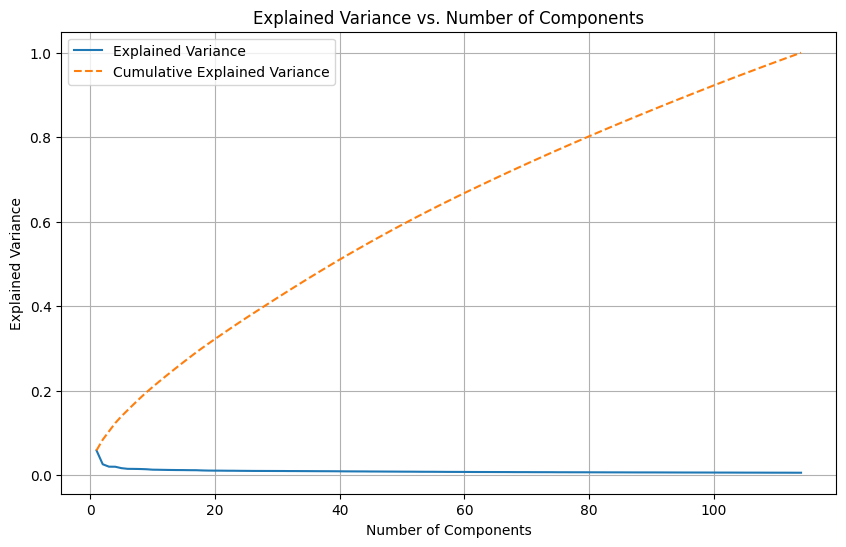

/Users/hailan/anaconda3/envs/seminar/lib/python3.13/site-packages/prince/famd.py:86: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  eta2[col] = (
/Users/hailan/anaconda3/envs/seminar/lib/python3.13/site-packages/prince/famd.py:86: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  eta2[col] = (
/Users/hailan/anaconda3/envs/seminar/lib/python3.13/site-packages/prince/famd.py:86: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

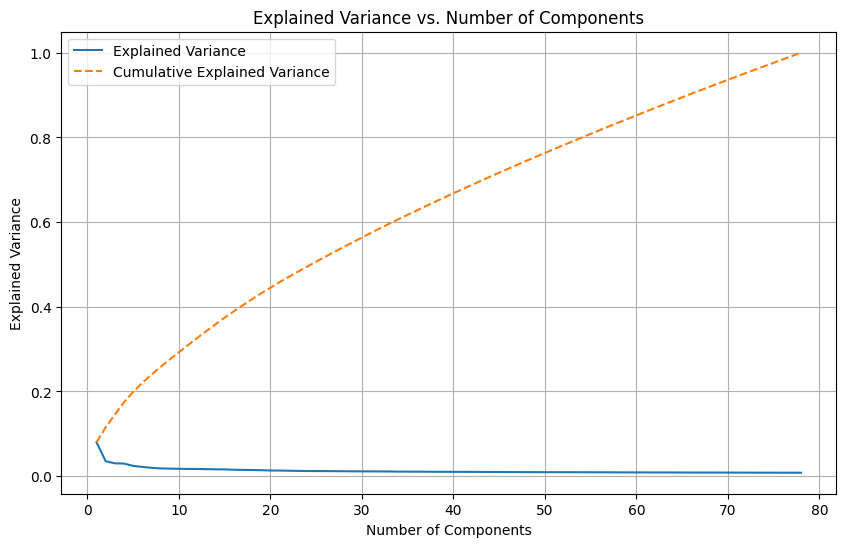

/Users/hailan/anaconda3/envs/seminar/lib/python3.13/site-packages/prince/famd.py:86: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  eta2[col] = (
/Users/hailan/anaconda3/envs/seminar/lib/python3.13/site-packages/prince/famd.py:86: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  eta2[col] = (
/Users/hailan/anaconda3/envs/seminar/lib/python3.13/site-packages/prince/famd.py:86: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

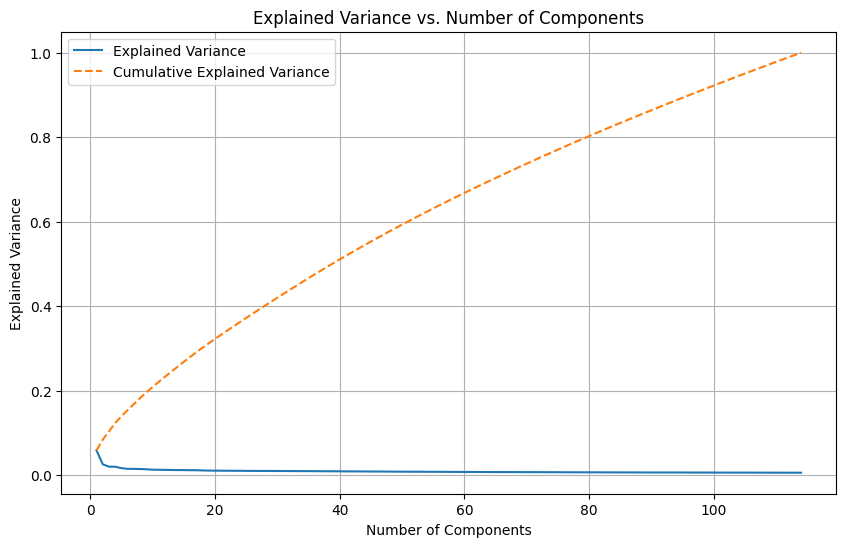

/Users/hailan/anaconda3/envs/seminar/lib/python3.13/site-packages/prince/famd.py:86: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  eta2[col] = (
/Users/hailan/anaconda3/envs/seminar/lib/python3.13/site-packages/prince/famd.py:86: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  eta2[col] = (
/Users/hailan/anaconda3/envs/seminar/lib/python3.13/site-packages/prince/famd.py:86: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

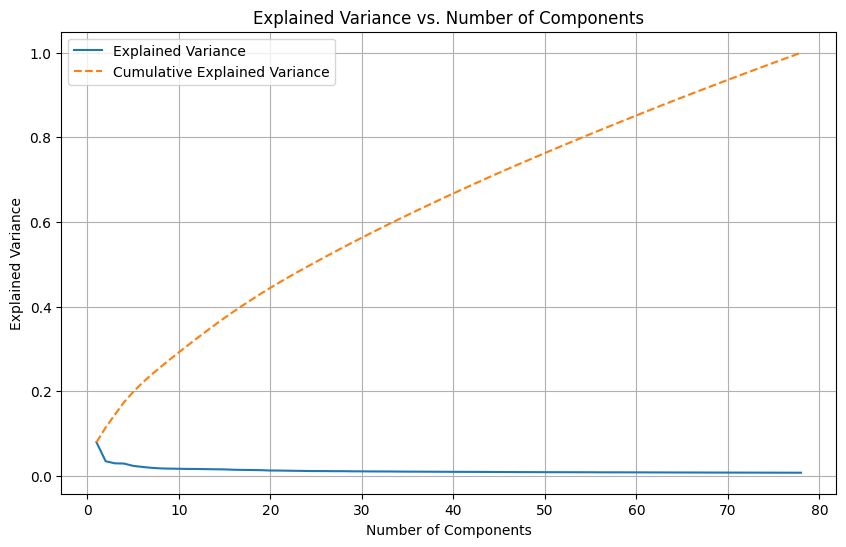

/Users/hailan/anaconda3/envs/seminar/lib/python3.13/site-packages/prince/famd.py:86: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  eta2[col] = (
/Users/hailan/anaconda3/envs/seminar/lib/python3.13/site-packages/prince/famd.py:86: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  eta2[col] = (
/Users/hailan/anaconda3/envs/seminar/lib/python3.13/site-packages/prince/famd.py:86: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

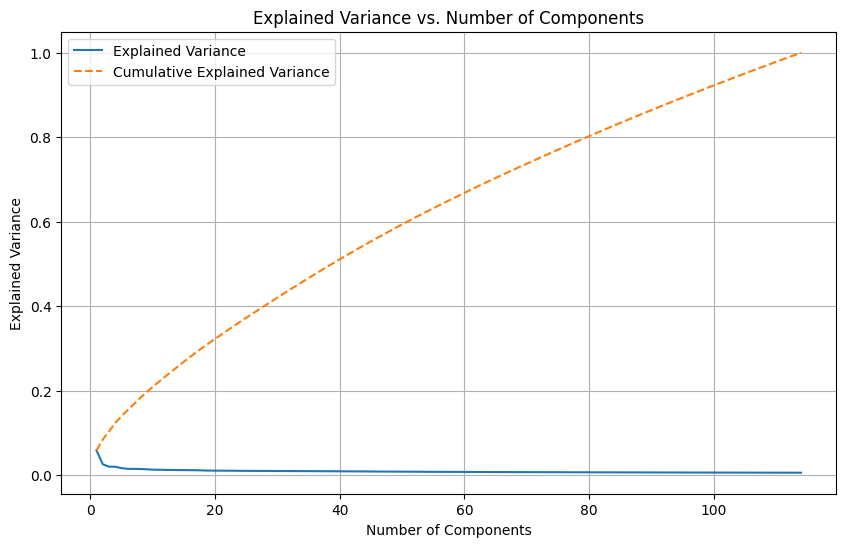

/Users/hailan/anaconda3/envs/seminar/lib/python3.13/site-packages/prince/famd.py:86: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  eta2[col] = (
/Users/hailan/anaconda3/envs/seminar/lib/python3.13/site-packages/prince/famd.py:86: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  eta2[col] = (
/Users/hailan/anaconda3/envs/seminar/lib/python3.13/site-packages/prince/famd.py:86: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

In [30]:
df_cleaned_nomissing90=FAMD_calc(df_cleaned_nomissing,0.9)
df_imputed90=FAMD_calc(df_imputed,0.9)
df_cleaned_nomissing95=FAMD_calc(df_cleaned_nomissing,0.95)
df_imputed95=FAMD_calc(df_imputed,0.95)
df_cleaned_nomissing85=FAMD_calc(df_cleaned_nomissing,0.85)
df_imputed85=FAMD_calc(df_imputed,0.85)

In [31]:
df_cleaned_nomissing90['original_wealth_index']=df['hv271']
df_imputed90['original_wealth_index']=df['hv271']
df_cleaned_nomissing95['original_wealth_index']=df['hv271']
df_imputed95['original_wealth_index']=df['hv271']
df_cleaned_nomissing85['original_wealth_index']=df['hv271']
df_imputed85['original_wealth_index']=df['hv271']

/var/folders/z_/86v4rkcx42l5ny9cxfq86xpr0000gn/T/ipykernel_67124/1781196220.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_imputed90['original_wealth_index']=df['hv271']
/var/folders/z_/86v4rkcx42l5ny9cxfq86xpr0000gn/T/ipykernel_67124/1781196220.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_imputed95['original_wealth_index']=df['hv271']
/var/folders/z_/86v4rkcx42l5ny9cxfq86xpr0000gn/T/ipykernel_67124/1781196220.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fram

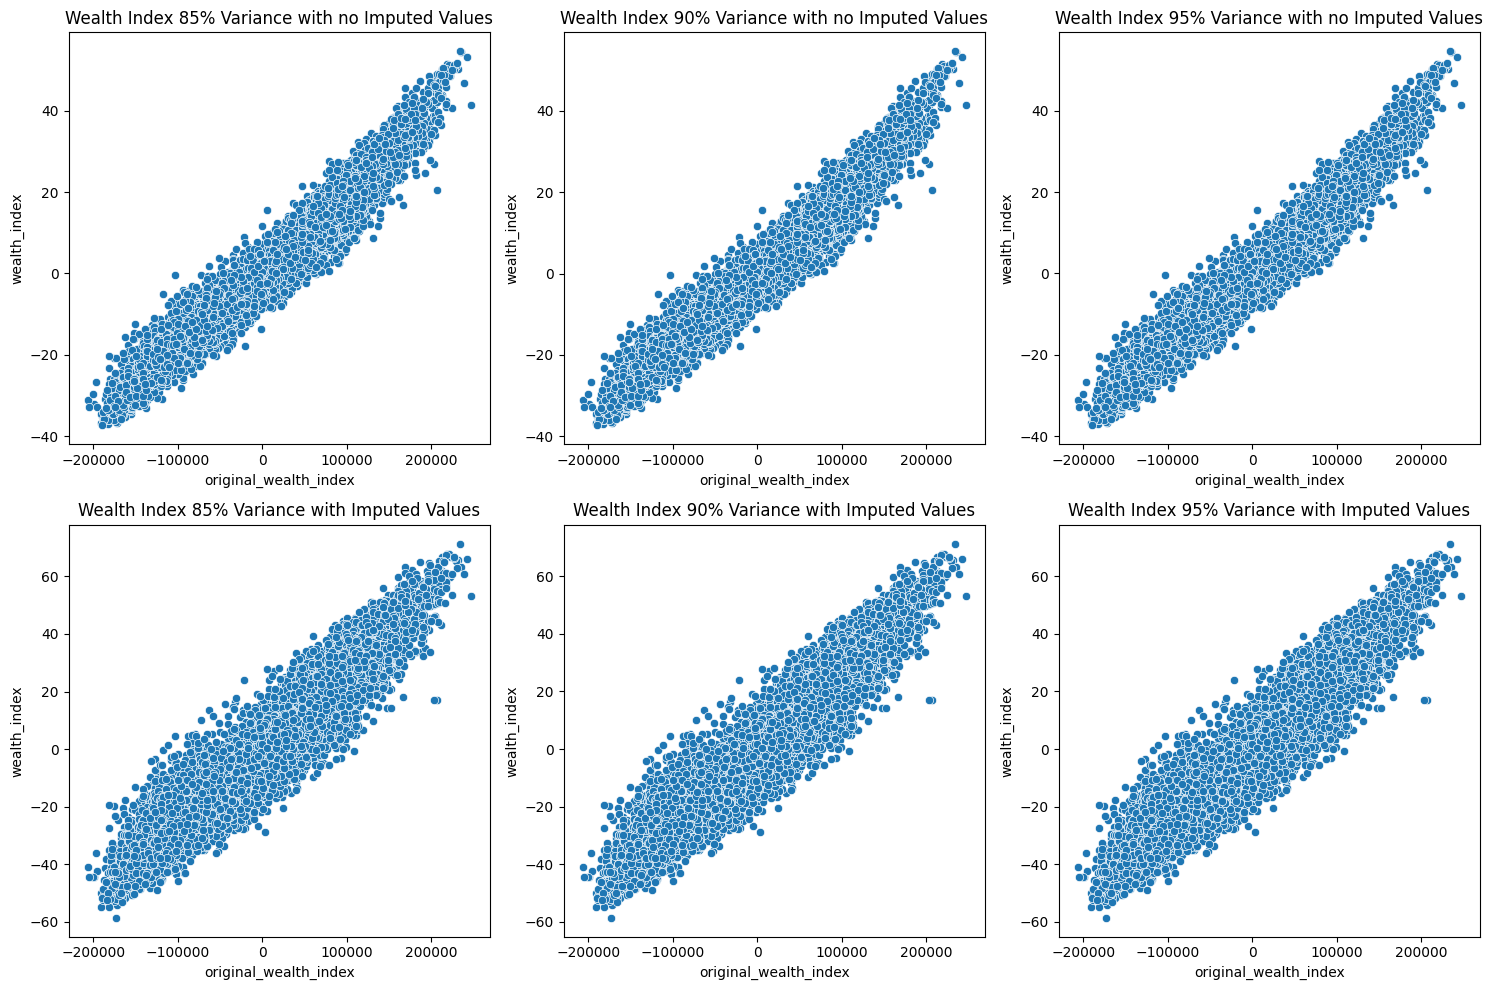

In [32]:
fig, axes=plt.subplots(2,3, figsize=(15,10))
sns.scatterplot(data=df_cleaned_nomissing85, x="original_wealth_index",y="wealth_index",ax=axes[0,0])
axes[0,0].set_title("Wealth Index 85% Variance with no Imputed Values")
sns.scatterplot(data=df_cleaned_nomissing90, x="original_wealth_index",y="wealth_index",ax=axes[0,1])
axes[0,1].set_title("Wealth Index 90% Variance with no Imputed Values")
sns.scatterplot(data=df_cleaned_nomissing95, x="original_wealth_index",y="wealth_index",ax=axes[0,2])
axes[0,2].set_title("Wealth Index 95% Variance with no Imputed Values")
sns.scatterplot(data=df_imputed85, x="original_wealth_index",y="wealth_index",ax=axes[1,0])
axes[1,0].set_title("Wealth Index 85% Variance with Imputed Values")
sns.scatterplot(data=df_imputed90, x="original_wealth_index",y="wealth_index",ax=axes[1,1])
axes[1,1].set_title("Wealth Index 90% Variance with Imputed Values")
sns.scatterplot(data=df_imputed95, x="original_wealth_index",y="wealth_index",ax=axes[1,2])
axes[1,2].set_title("Wealth Index 95% Variance with Imputed Values")

plt.tight_layout()
plt.show()